# Miniprojeto 2

### Integrantes: Henrique Guazzelli, Hugo Mendes, Pedro de la Peña - Engenharia B 

## Introdução

O objetivo do projeto foi realizar simulações para visualizar graficamente a distribuição das médias amostrais, além de calcular a média e a variância. 

Para realizar o miniprojeto, utilizamos dados do jogo online League of Legends. Os dados apresentam os campeões utilizados em uma partida (total de 127), popularidade e porcentagem de vitória. League of Legends é um jogo de luta entre duas equipes, cada uma contendo apenas 5 campeões, controlados por jogadores. 

Fizemos as simulações tanto para a popularidade quanto para a porcentagem de vitória. Contudo estes dados tem métodos específicos para seu cálculo, e não sabemos como calculá-los e os conseguimos a partir do site da desenvolvedora do jogo.

É importante lembrar que não é possivel ter campeões iguais no mesmo time, mas é possivel haver um mesmo campeão em cada time.

In [52]:
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

meu_diretorio = "C:/Users/Hugo/Documents/GitHub/CD/MiniProjeto2"
os.chdir(meu_diretorio)
dados = pd.read_excel("Mini2.xlsx")

In [53]:
dados

,Champion,Popularity,Win Rate
0,Aatrox,0.0094,0.3915
1,Ahri,0.0841,0.4779
2,Akali,0.0242,0.3833
3,Alistar,0.1053,0.5829
4,Amumu,0.0738,0.5526
5,Anivia,0.0568,0.4573
6,Annie,0.0792,0.4764
7,Ashe,0.1386,0.4970
8,Azir,0.1032,0.4258
9,Bard,0.0953,0.3441


Começamos plotando um gráfico com os valores da nossa amostra.


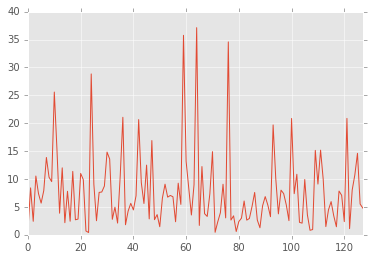

In [54]:
popularidade = dados.Popularity*100
popularidade.plot()


In [55]:
popularidade.max()

37.119999999999997

Para entender um pouco mais sobre como nossa amostra esta se comportando plotamos um histograma, que como indicado na figura possui assimetria à direita. Detalhe importante, caso quisessemos há varios tipos de distriuições que se encaixaiam com o formato desse historama encontrado.

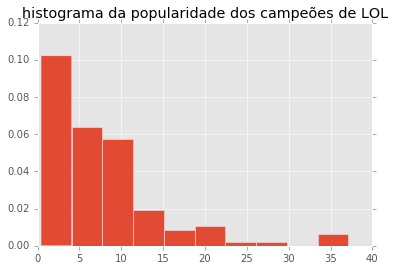

In [56]:
popularidade.hist(normed=1)
plt.title("histograma da popularidade dos campeões de LOL")

Cálculo da média e da variância da amostra, requisitos do mini projeto.

In [57]:
variancia = popularidade.var()
media = popularidade.mean()
print( "a variancia é ",variancia,"a média é ",media)

a variancia é  48.60371677534447 a média é  7.812890625000002


A partir daqui começamos a plotar os histogramas com a média de valores da amostra escolhidos aleatoriamente de 2 em 2, 4 em 4, 20 em 20 e por último de 50 em 50, esperando que os histogramas dessas médias tivessem o formato de uma normal.

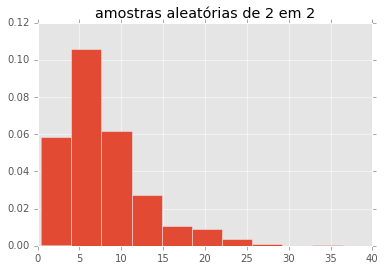

In [58]:
n2 = []
for i in range(10000):
    a = np.random.randint(0,128)
    b = np.random.randint(0,128)
    n2.append((popularidade[a]+popularidade[b])/2)
tentativas = pd.DataFrame()
tentativas["n2"] = n2
tentativas.n2.hist(normed=1)
plt.title("amostras aleatórias de 2 em 2")

In [59]:
variancia = tentativas.n2.var()
media = tentativas.n2.mean()
print( "a variancia é ",variancia,"a média é ",media)

a variancia é  23.496550359700034 a média é  7.783156000000005


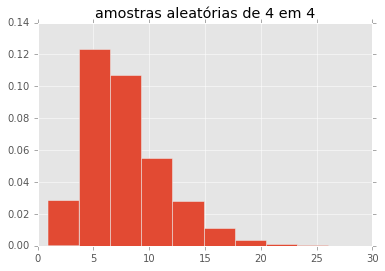

In [60]:
n4 = []
for i in range(10000):
    soma = 0
    for j in range(4):
        a = np.random.randint(0,128)
        soma+=popularidade[a]
    n4.append(soma/4)
        
tentativas = pd.DataFrame()
tentativas["n4"] = n4
tentativas.n4.hist(normed=1)
plt.title("amostras aleatórias de 4 em 4")


In [61]:
variancia = tentativas.n4.var()
media = tentativas.n4.mean()
print( "a variancia é ",variancia,"a média é ",media)

a variancia é  12.526305656633122 a média é  7.817165249999972


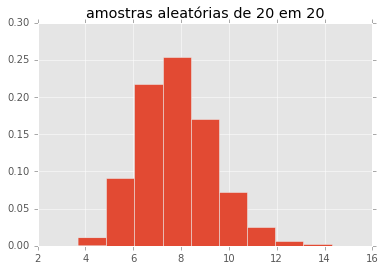

In [62]:
n20 = []
for i in range(10000):
    soma = 0
    for j in range(20):
        a = np.random.randint(0,128)
        soma+=popularidade[a]
    n20.append(soma/20)
        
tentativas = pd.DataFrame()
tentativas["n20"] = n20
tentativas.n20.hist(normed=1)
plt.title("amostras aleatórias de 20 em 20")

In [63]:
variancia = tentativas.n20.var()
media = tentativas.n20.mean()
print( "a variancia é ",variancia,"a média é ",media)

a variancia é  2.3497154054612595 a média é  7.798182700000005


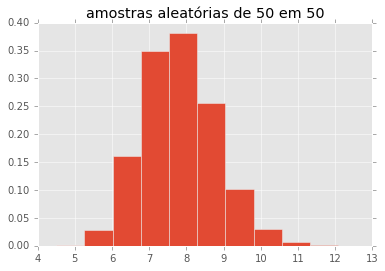

In [64]:
n50 = []
x1 = []
x9 = []
for i in range(10000):
    soma = 0
    for j in range(50):
        a = np.random.randint(0,128)
        soma+=popularidade[a]
        if j == 1:
            x1.append(popularidade[a])
        if j == 9:
            x9.append(popularidade[a])
    n50.append(soma/50)
        
tentativas = pd.DataFrame()
tentativas["n50"] = n50
tentativas.n50.hist(normed=1)
plt.title("amostras aleatórias de 50 em 50")

In [65]:
variancia = tentativas.n50.var()
media = tentativas.n50.mean()
print( "a variancia é ",variancia,"a média é ",media)

a variancia é  0.9771960627211097 a média é  7.810514600000046


Percebe-se que à medida que aumentamos a quantidade de valores aleatórios feitos para o cálculo de cada média o histograma tende a se comportar mais como a normal esperada.

Um outro requisito do mini projeto era Considerando as simulações de n = 50, por exemplo, analisar o primeiro e o nono valores sorteados em cada uma das 10.000 vezes.Para isso iremos plotar um histograma para os x1 e os x9.

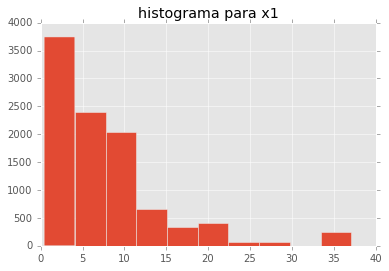

In [75]:
tentativas['x1'] = x1
tentativas.x1.hist()
plt.title('histograma para x1')

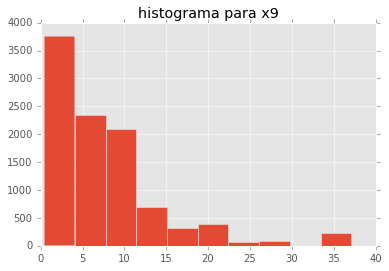

In [76]:
tentativas['x9'] = x9
tentativas.x9.hist()
plt.title('histograma para x9')

olha que bizarro!! o comportamente desses histogramas são idênticos ao histograma da amostra inteira de popularidade dos campeões comprovando o que foi visto em sala de aula. Ainda precisamos calcular a correlação entre os x1 e os x9 para podermos bater o martelo e classifica-los como independentes entre si ou não!

In [79]:
coeficiente_r = np.corrcoef(x1,x9)
coeficiente_r = coeficiente_r[0][1]
coeficiente_r

0.00075907052417432323

HAHA! Está comprovada a independência dessas duas variáveis aleatórias, seu coefieciente de correlação (r) está muito próximo de 0.

## Análise em relação ao Win Rate

A mesma análise foi feita em relação ao índice de vitórias de cada campeão, e ultilizamos a mesma estratégia para a analise. Só não faremos de novo a analise de x1 e x9 pois ja comprovamos que essa parte do TLC realmente funciona. 

A variância é: 37.906646942667344 
A média é: 48.814453125000014


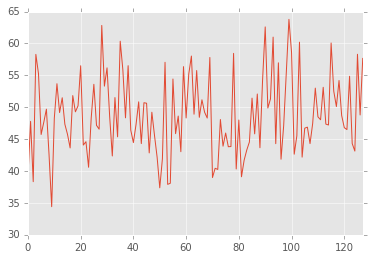

In [66]:
popularidade = dados["Win Rate"]*100
popularidade.plot()
variancia = popularidade.var()
media = popularidade.mean()
print( "A variância é:", variancia,"\nA média é:",media)

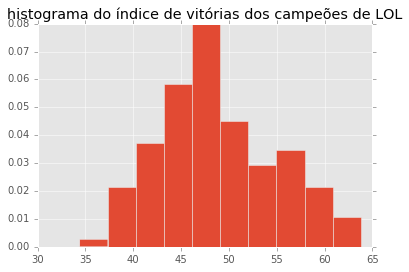

In [67]:
popularidade.hist(normed=1)
plt.title("histograma do índice de vitórias dos campeões de LOL")

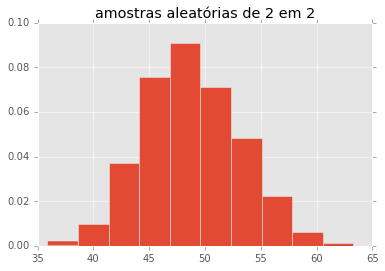

In [68]:
n2 = []
for i in range(10000):
    a = np.random.randint(0,128)
    b = np.random.randint(0,128)
    n2.append((popularidade[a]+popularidade[b])/2)
tentativas = pd.DataFrame()
tentativas["n2"] = n2
tentativas.n2.hist(normed=1)
plt.title("amostras aleatórias de 2 em 2")

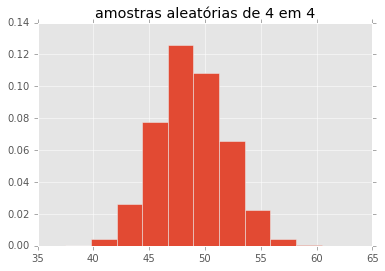

In [69]:
n4 = []
for i in range(10000):
    soma = 0
    for j in range(4):
        a = np.random.randint(0,128)
        soma+=popularidade[a]
    n4.append(soma/4)
        
tentativas = pd.DataFrame()
tentativas["n4"] = n4
tentativas.n4.hist(normed=1)
plt.title("amostras aleatórias de 4 em 4")


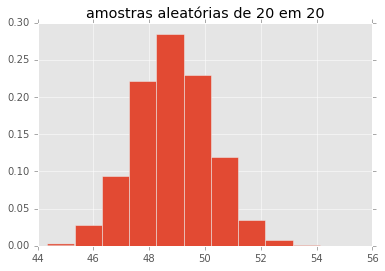

In [70]:
n20 = []
for i in range(10000):
    soma = 0
    for j in range(20):
        a = np.random.randint(0,128)
        soma+=popularidade[a]
    n20.append(soma/20)
        
tentativas = pd.DataFrame()
tentativas["n20"] = n20
tentativas.n20.hist(normed=1)
plt.title("amostras aleatórias de 20 em 20")

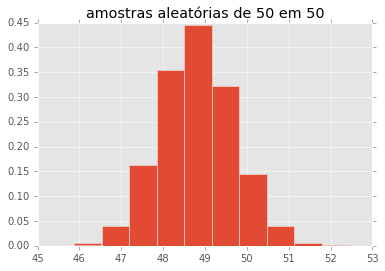

In [71]:
n50 = []
for i in range(10000):
    soma = 0
    for j in range(50):
        a = np.random.randint(0,128)
        soma+=popularidade[a]
    n50.append(soma/50)
        
tentativas = pd.DataFrame()
tentativas["n50"] = n50
tentativas.n50.hist(normed=1)
plt.title("amostras aleatórias de 50 em 50")

In [72]:
variancia = tentativas.n50.var()
media = tentativas.n50.mean()
print( "a variancia é ",variancia,"a média é ",media)

a variancia é  0.7661804356015766 a média é  48.81196561999999


Opa! A maneira com a qual analisamos foi a mesma, mas olha que interessante, o comportamento do histograma ja se parecia com uma normal para valores de n mais baixos inclusive, e não só isso, aconteceu exatamente como estudado em sala de aula, a medida que aumentamos o n a normal começou a ficar mais estreita pois a densidade em torno da média se tornou maior, o fato de que o histograma da amostra ja se parecia com uma normal (mas não é, pois não era simétrico) ajudou para que saísse tudo mais "bonitinho"! Isso se deve ao fato que a medida que o n aumenta a chance de você conseguir uma média bem distante da esperada diminui, pois quanto maior o n mais perto da população amostral total você está, o resultado desse n "muito grande" é uma normal "achatada".
Como conclusão das duas análises e utilizando como base o histograma com n = 50, a popularidade média e o índice de vitórias dos campeões de league of legends são respectivamente, valores em torno de 7,8% e 48,8%.